<a href="https://colab.research.google.com/github/hyehyuni/essa/blob/main/hw_0501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[과제]**

**파이썬 머신러닝 완벽가이드 ch4. 1 ~ 5 (2 제외) pg. 183 ~ 227 (201~211 제외)**


---



# **04. 분류** 

## **01. 분류의 개요**

지도학습은 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다.

<분류>

대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측한다.

* 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
* 선형 관계성에 기반한 로지스틱 회귀 
* 데이터균일도에 따른 규칙 기반의 결정트리 
* 개별 클래스 간의 최대 분류 마진을 찾아주는 서포트 벡터 머신 
* 최소 근접 알고리즘
* 심층 연결 기반의 신경망 
* 머신러닝 알고리즘을 결합한 앙상블 

<앙상블>

앙상블은 일반적으로 배깅, 부스팅 방식으로 나뉜다. 배깅 방삭의 대표인 랜덤 포레스트는 뛰어난 예측 성능, 빠른 수행시간을 가진다. 그러나 근래에는 부스팅 방식이발전하고 있다. 그래디언트 부스팅은 뛰어난 예측 성능을 가지지만 수행 시간이 너무 오래걸린다는 단점이 있어서 최적화 모델 튜니이 어려웠다. 하지만 XGboost, LightGBM 등으로 예측성능을 발전시키고 수행 시간도 단축시킨 알고리즘이 등장함

<결정트리>

데이터 스케일링, 정규화 등 사전 가공의 영향이 매우 적다. 하지만 과적합의 위험이 있다. 이러한 단점은 앙상블에서 장점으로 작용한다.

## **02.결정트리**

결정트리는 머신러닝 알고리즘 중 가장 직관적으로 이해하기 쉬운 알고리즘이며, 데이터에 있는 규칙을 학습을 통해 자동으로 찾안 트리 기반의 분류 규칙을 만드는 것이다. 

-> 스무고개 게임과유사하며 if,else를 자동으로 찾아내 예측을 위한 규칙을 만드는 알고리즘이라 생각하면된다.

* 규칙 노드 : 규칙 조건 
* 리프 노드 : 결정된 클래스 값
* 서브 트리 : 새로운 규칙 조건마다 생성 

<균일도>

결정노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터를 만들고, 다시 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식으로 내려가며 반복하는 형식. 

이렇게 정보의 균일도를 측정하는 대표적 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음.

* 정보 이득 : 엔트로피 개념 기반. 정보 이득 지수는 1-엔트로피 지수. 정보 이득이 높은 속성을 기준으로 분할

* 지니계수 : 경제학에서 불평들 지수를 나타낼 때 사용하는 계수, 지니 계수가 낮은 속성을 기준으로 분할

### **1) 결정 트리 모델의 특징**

(1) 장점 
- 쉽고, 직관적이다.
- 피처 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음 

(2) 단점 
- 과적합으로 알고리즘 성능이 떨어짐. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요함

### **2) 결정트리 파라미터**

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스 제공.


* min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합 제어에 사용, 디폴트는 2, 작게 설정할수록 분할되는 노드 많아져 과적합 가능성 증가

* min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수, 과적한 제어 용도지만 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요.

* max_features : 최적 분할을 위해 고려할 최대 피처 개수, 디폴트는 None

* max_depth : 트리의 최대 깊이, 디폴트는 None

* max_leaf_nodes : 말단 노드의 최대 개수

### **3) 결정 트리 모델의 시각화**

결정 트리 알고리즘 시각화는 by Graphviz 패키지를 사용한다. 이는 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시작화할 수 있는 패키지이다. + exort_graphviz() API 제공

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* 붓꽃 데이터 세트를 DecisionTreeClassifier를 이용해 학습해보기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

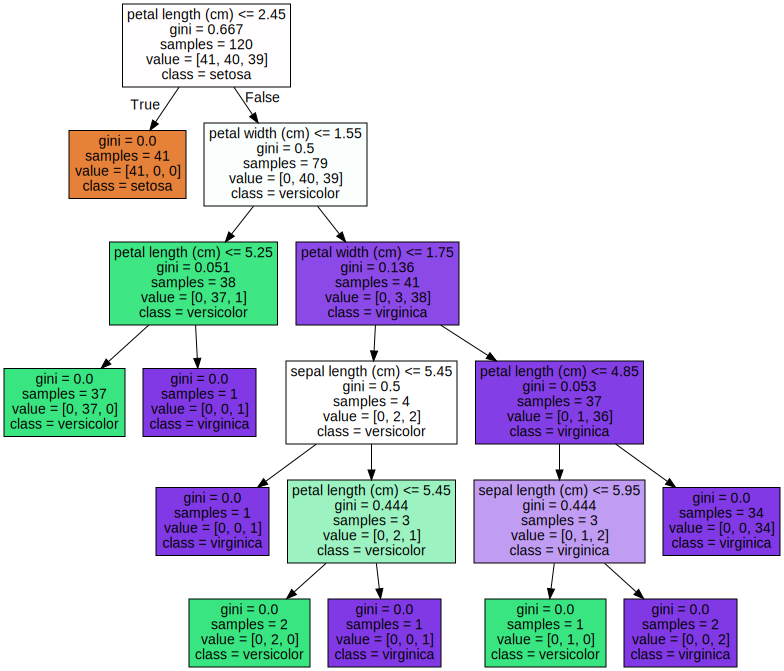

In [ ]:
import graphviz

#위에서 생성된 tree.dot 파일 Graphviz가 읽어서 주피터 노트북상에서 시각화

with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

=> 출력된 결과를 보면 각 규칙에 따라 브랜치 노드와 말단 리프 노드가 어떻게 구성되는지 한눈에 알 수 있다.

=> 리프노드 : 더이상 자식 노드가 없는 노드로, 최종 클래스 값이 결정되는 노드이다.
* gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수 
* samples는 형 규칙에 해당하는 데이터 건수 
* value=[]는 클래스 값 기반의 데이터 건수 

<max_depth 하이퍼 파라미터>
- 이는 결정 트리의 최대 트리 깊이를 제어함 
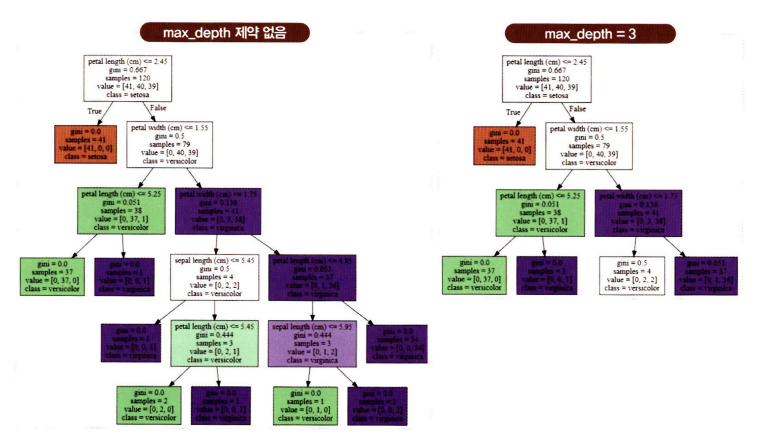


<min_samples_split 하이퍼 파라미터>
- 이는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 
- 아래 예시는 4로 설정한 경우

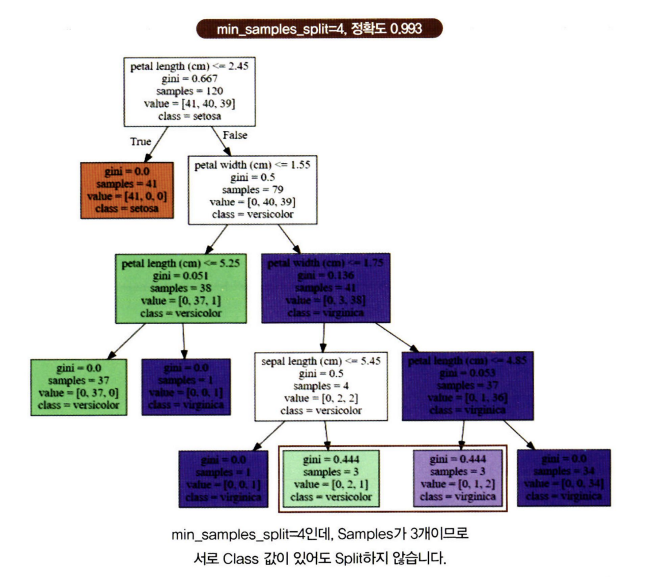

<min_samples_leaf 하이퍼파라미터>
- 이는 리프노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정

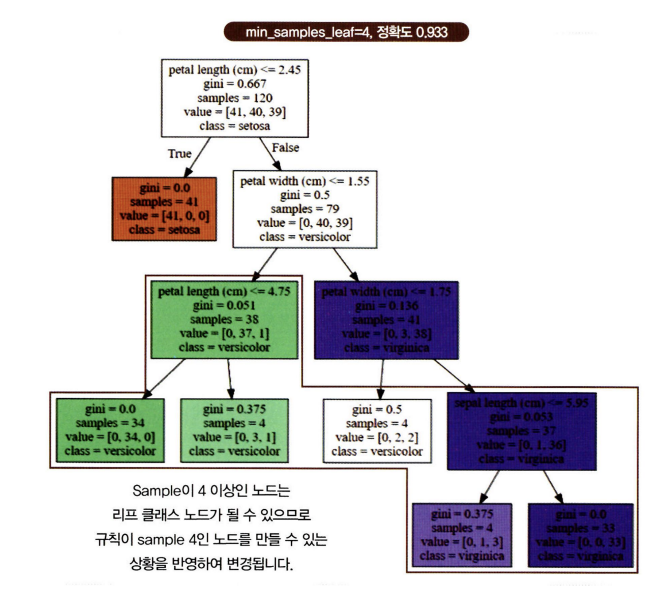

* feature_importances_ 속성을 가져와 피처별로 중요도 값을 매핑하고 이를 막대 그래프로 표현 


Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

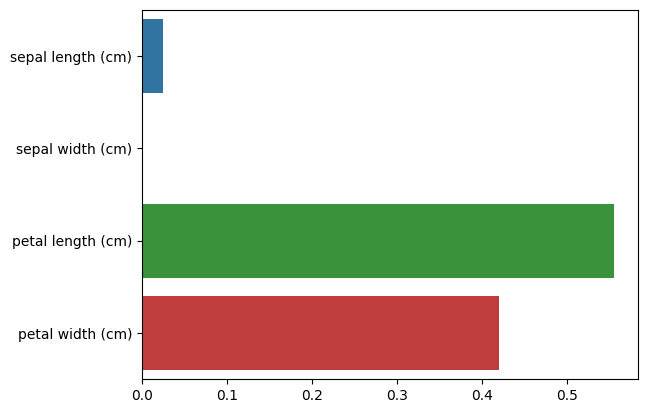

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance 를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

=> 여러 피쳐들 중에서 petal_length가 가장 피처 중요도가 높음을 알 수 있다. 

=> 규칙 트리의 시각화와 feature_importances_ 속성을 통해서 결정트리 알고리즘이 어덯게 동작하는지 직관적으로 이해 가능

### **4) 결정 트리 과적합**

make_calssification() 사용해 분류를 위한 임의의 데이터 세트 만든다.

2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 셋 만들고 시각화한다.

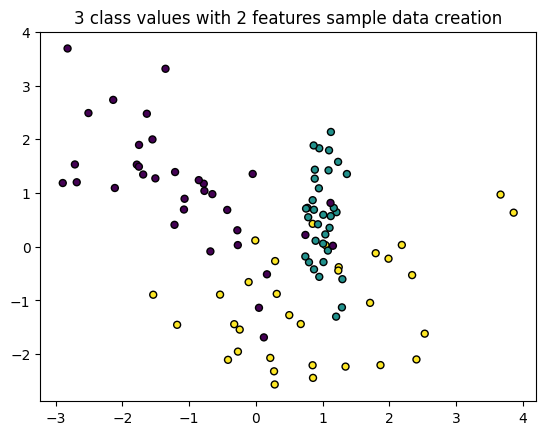

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

#2차원 시각화 위해 피처 2개, 클래스 3개 유형의 분류 샘플 데이터 생성
X_features, y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

* 결정트리의 하이퍼 파라미터를 디폴트 한 뒤, 어떤 결정 기준을 가지고 분할하는지 확인

  => 이때, visualize_boundary()를 사용함

In [ ]:
import numpy as np

### Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  fig,ax = plt.subplots()
  
  # 학습 데이터를 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
             clim = (y.min(), y.max()), zorder = 3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
    
  # 호출 파라미터로 들어온 train 데이터로 model 학습
  model.fit(X, y)
  
  # meshgrid 형태인 모든 좌표값으로 예측 수행
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200),
                       np.linspace(ylim_start, ylim_end, num = 200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  
  # contourf()를 이용하여 class boundary를 visualization
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                         levels = np.arange(n_classes + 1) - 0.5,
                         cmap = 'rainbow', clim = (y.min(), y.max()),
                         zorder = 1)

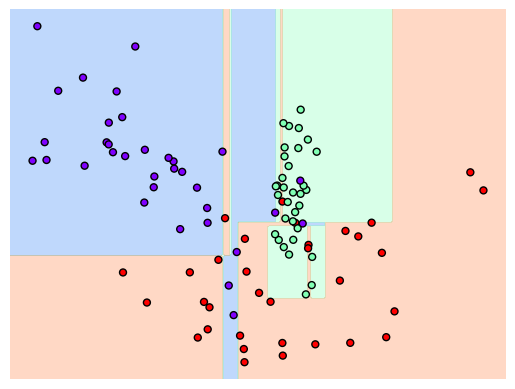

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

=> 이상치 데이터까지 분류하기 위해 분할이 일어나서 결정 기준 경계가 매우 많아짐. 이는 다른 미래의 데이터에 예측을 진행하면 예측 정확도가 떨어지도록 한다.

* min_samples_leaf=6으로 트리 생성 조건 제약

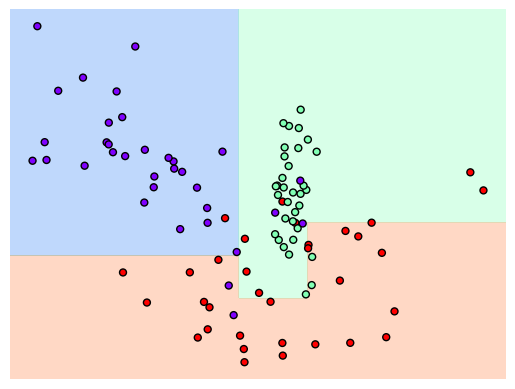

In [ ]:
#min_samples_lear=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

=> 이전보다 좀 더 일반화된 분류 규칙에 따라 분류됨. 과적합을 막기 위해서는 조건을 부여한 두번째가 더 뛰어나다.

## **03. 분류의 개요**

### **1) 앙상블 학습의 개요**

앙상블 학습을 통한 분류는 여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다. 

앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나누어지며, 스태깅을 포함한 앙상블 방법도 있음 

* 보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측결과를 결정하는 방식이다.

* 다른점은 보팅의 경우 일반적으로 다른 알고리즘을 가진 분류기를 결합하며, 배깅은 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 다르게 가져가면서 수행

* 부스팅은  여러 개의 분류기가 순차적으로 학습을 수행하되 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행

* 스태킹은  여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 예측하는 방법

### **2) 보팅 유형 : 하드보팅, 소프트보팅**

(1) 하드보팅
- 다수결 원칙과 비슷함 
- 예측한 결과값들중 다수의 분류가 결정한 예측값을 최종 보팅 결값으로 선정함 

(2) 소프트 보팅 
- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정함

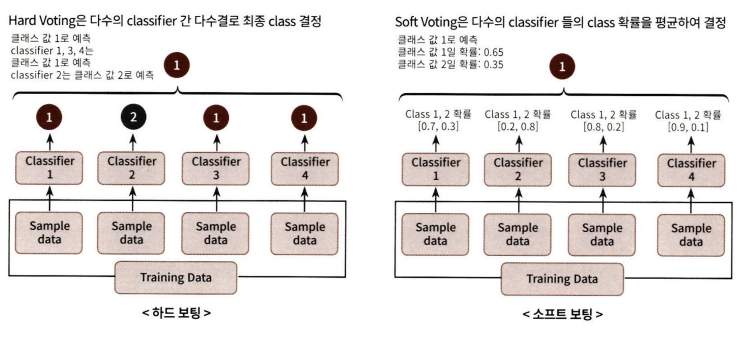

### **3) 보팅 분류기**

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* 로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기 만들기

In [ ]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


=> 보팅 분류기가 정확도가 조금 높게 나타남. 

=> 앙상블 방법은 전반적으로 다른 단일 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다.

## **04.랜덤 포레스트**

### **1) 랜덤포레스트의 개요 및 실습**

배깅은 앞에서 소개한 보팅과는 다르게 같은 알고리즘으로 여러 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

<랜덤 포레스트>
* 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보임
* 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

* 부트스트래핑 분할 방식 : 여러 개의 데이터 세트를 중첩되게 분리하는 것

In [19]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/esaa/자료/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### **2) 랜덤 포레스트 하이퍼 파라미터 및 튜닝**

트리기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고 튜닝을 위한 시간이 소모된다는 점

* n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정하며 default는 10개임. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님. 또한 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함

* max_features:  결정 트리에 사용된 max_features 파라미터와 같음. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같음. 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조함

* max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

* GridSearchCV를 이용하기 

In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행 (n_jobs=-1: 모든 CPU 코어를 이용해 학습)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


* n_estimators=300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 학습

In [22]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


* 피처 중요도를 막대그래프로 시각화

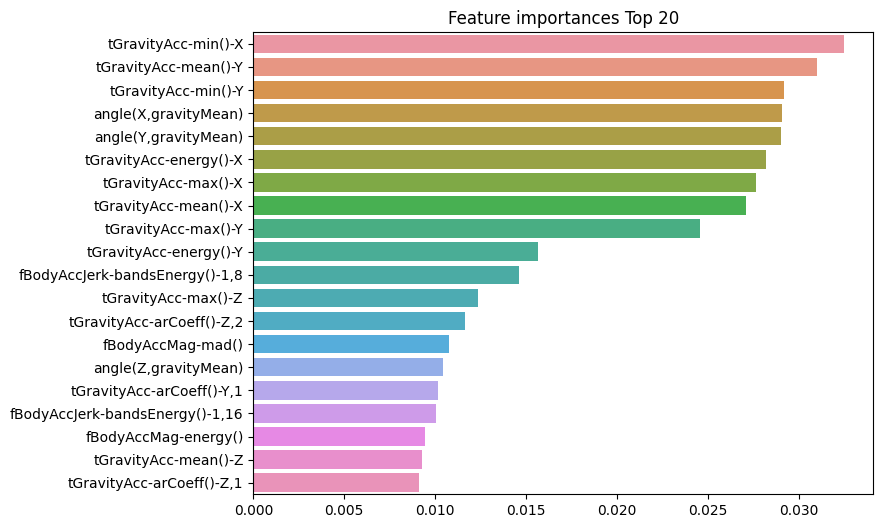

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## **05) GBM**

### **01) GBM의 개요 및 실습**

부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다.

* AdaBoosting

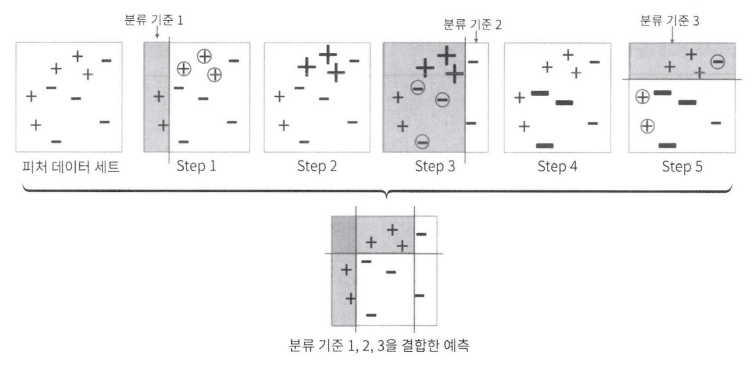


* GBM
 - 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이이다. 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 1008.0초


=> 기본 하이퍼 파라미터만으로 93%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 냈다. 

=> 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 더 뛰어나다. 그러나 수행 시간이 오래걸리고, 하이퍼 파라미터 튜닝 노력도 필요하다.

### **2) GBM 하이퍼 파라미터 및 튜닝**

* loss: 경사 하강법에서 사용할 비용 함수를 지정. 특별한 이유가 없으면 기본값인 'deviance' 적용

* learning_rate
 - GBM이 학습을 진행할 때마다 적용하는 학습률임. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수이다. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1.
 - learning_rate을 작게 하고 - n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음. 하지만 수행 시간이 너무 오래 걸리는 단점이 있으며 예측 성능 역시 현격히 좋아지지는 않음.

* n_estimators: weak learner의 개수,weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있음. 하지만 개수가 많을수록 수행 시간이 오래 걸림. 기본값은 100

* subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1이며 이는 전체 학습 데이터를 기반으로 학습한다는 의미임. 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))